In [1]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy import integrate
from module2 import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

bin_centres = np.geomspace(1e4, 1e-4, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, 6)
m_2 = np.geomspace(1e4, 1e-4, 6)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 

m_i = 10000.0000 M☉ , z_i = 3.5306e+12
m_i = 251.1886 M☉ , z_i = 4.1164e+13
m_i = 6.3096 M☉ , z_i = 4.7994e+14
m_i = 0.1585 M☉ , z_i = 5.5956e+15
m_i = 0.0040 M☉ , z_i = 6.5240e+16
m_i = 0.0001 M☉ , z_i = 7.6065e+17


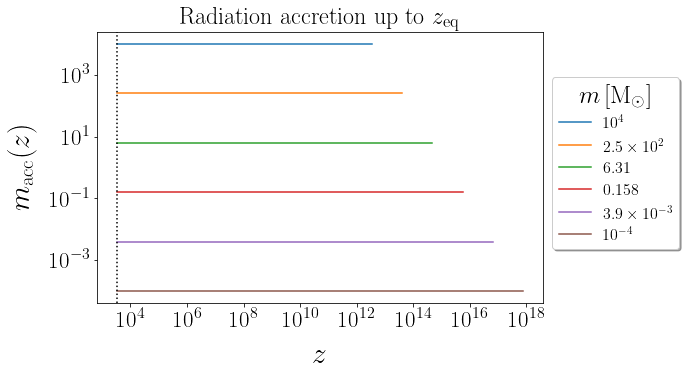

In [2]:
#Accretion of radiation around the PBH in radiation domination 
# as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# v<< c_s


def m_racc(m, z):
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * (((8 * π * ρ_c0 * G)/3)**(-1/2))
    def integrand(z):
         return ((1 + z)**4) * ((((Ω_r0 * ((1 + z)**4)) + Ω_m0 * ((1 + z)**3)))**(-1/2))
    step_size = 10
    zs = np.arange(z_i, z, step_size)
    I = integrand(zs)
    integral = spi.trapezoid(I, zs)
    first_term  = α *  ρ_r0  * integral
    second_term = 1/m
    return (1/(first_term + second_term))


fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m)
    print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 10)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    for j, z in enumerate(z_list): 
        m_change_list[j] = (m_racc(m, z))
    ax.loglog(z_list, m_change_list/M_solar, color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$m_\mathrm{acc}(z) $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

m_i = 10000.0000 M☉ , z_i = 3.5306e+12
m_i = 251.1886 M☉ , z_i = 4.1164e+13
m_i = 6.3096 M☉ , z_i = 4.7994e+14
m_i = 0.1585 M☉ , z_i = 5.5956e+15
m_i = 0.0040 M☉ , z_i = 6.5240e+16
m_i = 0.0001 M☉ , z_i = 7.6065e+17


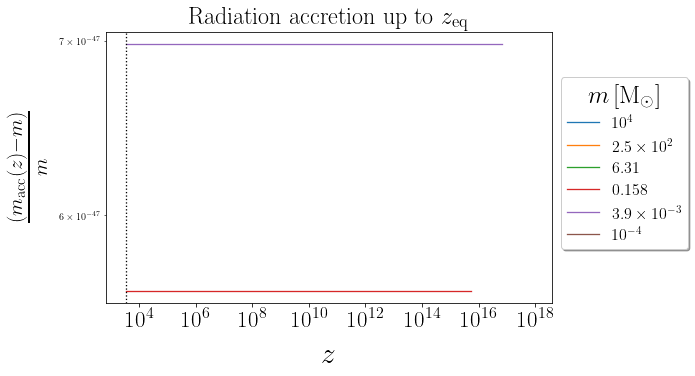

In [3]:
# Fractional change in the masses of the PBHs due to accretion 
# in radiation domination to z_eq, post PBH formation.



fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m)
    print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 10)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    for j, z in enumerate(z_list): 
        m_change_list[j] = (m_racc(m, z) - m)/m
    ax.loglog(z_list, m_change_list/M_solar, color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_\mathrm{acc}(z) - m)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('raccΔ.pdf', bbox_inches = 'tight')
plt.show()

m_i = 10000.0000 M☉ , z_i = 3.5306e+12
m_i = 251.1886 M☉ , z_i = 4.1164e+13
m_i = 6.3096 M☉ , z_i = 4.7994e+14
m_i = 0.1585 M☉ , z_i = 5.5956e+15
m_i = 0.0040 M☉ , z_i = 6.5240e+16
m_i = 0.0001 M☉ , z_i = 7.6065e+17


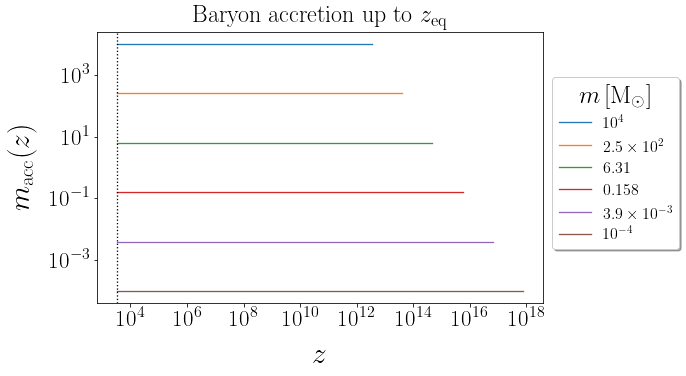

In [5]:
#Accretion of baronic matter/gas around the PBH as per ρ = ρ_b,0 (1 + z)³ up to z_eq.
# v<< c_s



def m_bacc(m, z):
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * (((8 * π * ρ_c0 * G)/3)**(-1/2))
    def integrand(z):
         return ((1 + z)**4) * ((((Ω_r0 * ((1 + z)**3)) + Ω_m0 * ((1 + z)**3)))**(-1/2))
    step_size = 10
    zs = np.arange(z_i, z, step_size)
    I = integrand(zs)
    integral = spi.trapezoid(I, zs)
    first_term  = α *  ρ_m0  * integral
    second_term = 1/m
    return (1/(first_term + second_term))


fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m)
    print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 10)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    for j, z in enumerate(z_list): 
        m_change_list[j] = (m_bacc(m, z))
    ax.loglog(z_list, m_change_list/M_solar, color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$m_\mathrm{acc}(z)$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('Baryon accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('bacc.pdf', bbox_inches = 'tight')
plt.show()

m_i = 10000.0000 M☉ , z_i = 3.5306e+12
m_i = 251.1886 M☉ , z_i = 4.1164e+13
m_i = 6.3096 M☉ , z_i = 4.7994e+14
m_i = 0.1585 M☉ , z_i = 5.5956e+15
m_i = 0.0040 M☉ , z_i = 6.5240e+16
m_i = 0.0001 M☉ , z_i = 7.6065e+17


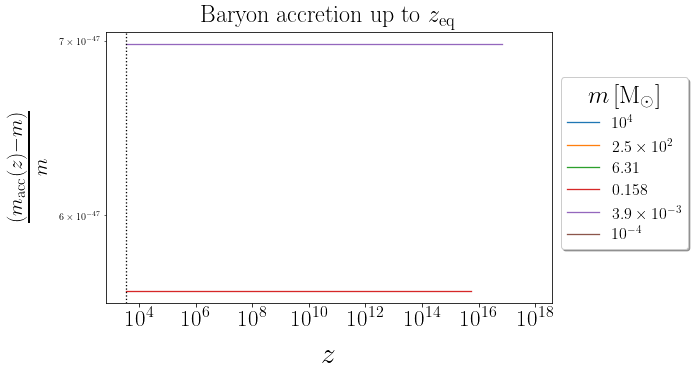

In [6]:
#Fractional change in the mass of the PBH due to Baryon accretion upto z_eq.


fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m)
    print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 10)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    for j, z in enumerate(z_list): 
        m_change_list[j] = (m_bacc(m, z) - m)/m
    ax.loglog(z_list, m_change_list/M_solar, color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_\mathrm{acc}(z) - m)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('Baryon accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('baccΔ.pdf', bbox_inches = 'tight')
plt.show()